# 1. Testing performances of the MR-Sort Solver
- Accuracy
- F1-score
- Execution time
- Noise sensibility

In [1]:
# Test Generator
import sys
sys.path.append('../')

from generator import GradesGenerator
from models import MRSort_Solver
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

size = 100
nb_grades = 5
noise = 0
n_iter = 25

f1_scores = []
accuracys = []
times = []
error_counts = []

for iteration in tqdm(range(n_iter)):
    gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise)
    grades,admission = gen.generate_grades()
    #gen.analyze_gen()

    # Test MR-Sort
    MRSort_solv = MRSort_Solver(gen)
    MRSort_solv.set_constraint('MaxMin')
    MRSort_solv.solve()
    f1_score_, accuracy_, time_, error_count = MRSort_solv.get_results(verbose=0)

    f1_scores += [f1_score_]
    accuracys += [accuracy_]
    times += [time_]
    error_counts += [error_count]
f1_score_avg = np.mean(f1_scores)
accuracy_avg = np.mean(accuracys)
time_avg = np.mean(times)
error_count_sum = np.sum(error_counts)

print('Avg f1_score : {:.2f} %'.format(f1_score_avg*100))
print('Avg average :  {:.2f} %'.format(accuracy_avg*100))
print('Avg time :  {:.2f} s'.format(time_avg))
print(f'Error count : {error_count_sum}')

  0%|          | 0/25 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-30


100%|██████████| 25/25 [00:55<00:00,  2.23s/it]

Avg f1_score : 86.53 %
Avg average :  94.36 %
Avg time :  1.15 s
Error count : 0


In [2]:
def test_solver(size, nb_grades, noise, n_iter):
    """
    Print test the solver
    Args: 
        size (int): number of students
        nb_grades (int): number of grades
        noise (float): ratio of noise
        n_iter (int): nb d'iteration for average metrics
    Returns :
        f1_score_avg (float): average f1-score of the solution
        accuracy_avg (float): average accuracy of the solution
        time_avg (float): average time spent trying to find the optimum
        error_count_sum (int): sum of 1/0 based on if gurobi converges or not 
     """
    f1_scores = []
    accuracys = []
    times = []
    error_counts = []

    for iteration in tqdm(range(n_iter)):
        gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise)

        # Test MR-Sort
        MRSort_solv = MRSort_Solver(gen)
        MRSort_solv.set_constraint('MaxMin')
        MRSort_solv.solve()
        f1_score_, accuracy_, time_, error_count = MRSort_solv.get_results(verbose=0)

        f1_scores += [f1_score_]
        accuracys += [accuracy_]
        times += [time_]
        error_counts += [error_count]
    f1_score_avg = np.mean(f1_scores)
    accuracy_avg = np.mean(accuracys)
    time_avg = np.mean(times)
    error_count_sum = np.sum(error_counts)
    return f1_score_avg, accuracy_avg, time_avg, error_count_sum


### 1.1 Test the influence of nb_grades

In [33]:
size = 100
nb_grades_range = [1,2,3,4,5,6,7,8,9,10]
noise = 0
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for nb_grades in nb_grades_range:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [04:04<00:00, 24.42s/it]


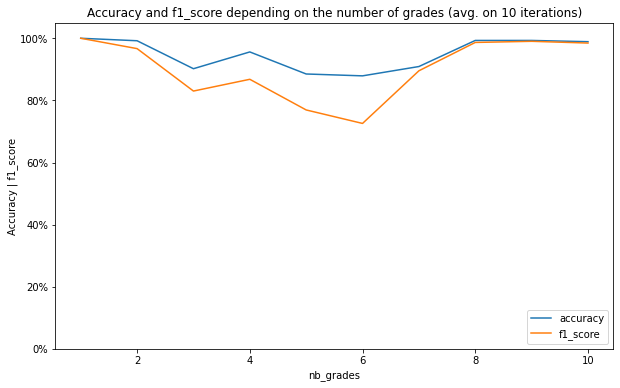

In [34]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(nb_grades_range, np.array(accuracys_)*100, label='accuracy')
plt.plot(nb_grades_range, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of grades (avg. on 10 iterations)")
plt.xlabel("nb_grades")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')


Text(0, 0.5, 'time (s)')

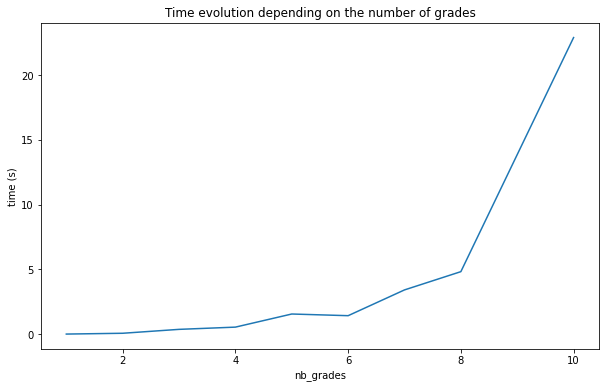

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_grades_range, times_)

plt.title("Time evolution depending on the number of grades")
plt.xlabel("nb_grades")
plt.ylabel("time (s)")

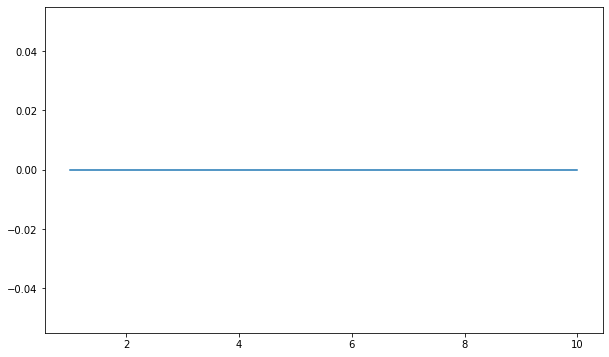

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_grades_range, error_counts_)

### 1.2 Test the influence of size

In [3]:
sizes = [20,50,100,150,250,500,1000]
nb_grades = 3
noise = 0
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for size in sizes:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [06:06<00:00, 36.70s/it]


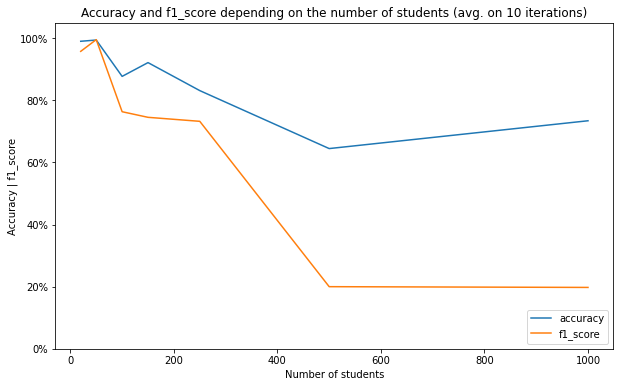

In [4]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(sizes, np.array(accuracys_)*100, label='accuracy')
plt.plot(sizes, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of students (avg. on 10 iterations)")
plt.xlabel("Number of students")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

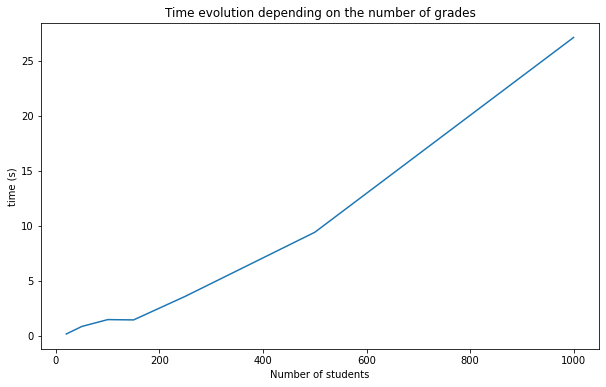

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(sizes, times_)

plt.title("Time evolution depending on the number of students")
plt.xlabel("Number of students")
plt.ylabel("time (s)")

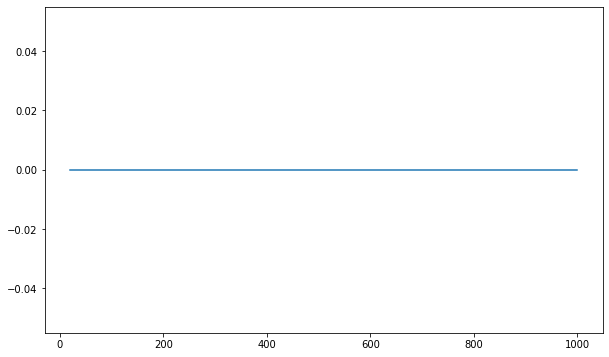

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(sizes, error_counts_)

### 1.3 Test the influence of noise

In [3]:
size = 150
nb_grades = 3
noises = [0,0.01,0.03,0.05,0.07,0.1]
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for noise in noises:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

 10%|█         | 1/10 [00:03<00:33,  3.68s/it]

 40%|████      | 4/10 [00:13<00:19,  3.26s/it]

 50%|█████     | 5/10 [00:15<00:15,  3.06s/it]

100%|██████████| 10/10 [00:34<00:00,  3.45s/it]


 10%|█         | 1/10 [00:03<00:31,  3.51s/it]

 70%|███████   | 7/10 [00:17<00:08,  2.76s/it]

 80%|████████  | 8/10 [00:21<00:06,  3.07s/it]

 90%|█████████ | 9/10 [00:26<00:03,  3.86s/it]

 20%|██        | 2/10 [00:10<00:44,  5.57s/it]

 30%|███       | 3/10 [00:21<00:56,  8.07s/it]

 60%|██████    | 6/10 [00:40<00:31,  7.90s/it]

 70%|███████   | 7/10 [00:45<00:20,  6.81s/it]

 80%|████████  | 8/10 [00:48<00:11,  5.75s/it]

 90%|█████████ | 9/10 [00:51<00:04,  4.64s/it]

100%|██████████| 10/10 [00:54<00:00,  5.44s/it]


 10%|█         | 1/10 [00:02<00:21,  2.37s/it]

 20%|██        | 2/10 [00:06<00:28,  3.51s/it]

 30%|███       | 3/10 [00:09<00:20,  2.99s/it]

 50%|█████     | 5/10 [00:15<00:16,  3.29s/it]

 70%|███████   | 7/10 [00:20<00:08,  2.84s/it]

 80%|████████  | 8/10 [00:23<00:05,  2.88s/it]

100%|██████████| 10/10 [00:30<00:00,  3.10s/it]


 20%|██        | 2/10 [00:04<00:19,  2.50s/it]

 30%|███       | 3/10 [00:09<00:24,  3.49s/it]

 40%|████      | 4/10 [00:13<00:22,  3.73s/it]

 50%|█████     | 5/10 [00:16<00:16,  3.38s/it]

 80%|████████  | 8/10 [00:23<00:05,  2.75s/it]

 90%|█████████ | 9/10 [00:26<00:02,  2.83s/it]

100%|██████████| 10/10 [00:29<00:00,  2.90s/it]

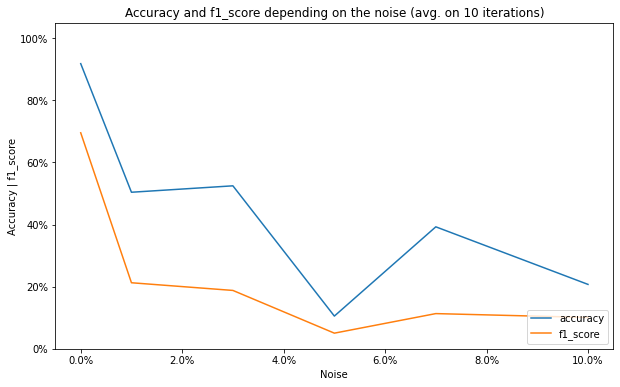

In [8]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(np.array(noises)*100, np.array(accuracys_)*100, label='accuracy')
plt.plot(np.array(noises)*100, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the noise (avg. on 10 iterations)")
plt.xlabel("Noise")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

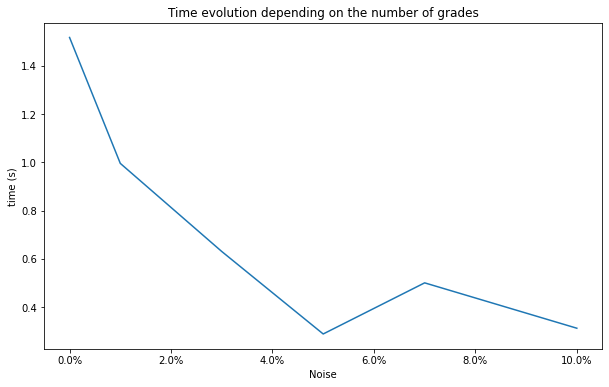

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(np.array(noises)*100, times_)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Time evolution depending on the noise")
plt.xlabel("Noise")
plt.ylabel("time (s)")

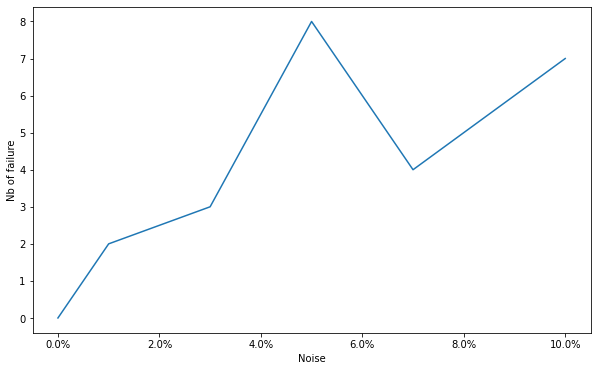

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylabel("Nb of failure", labelpad=2)
plt.xlabel("Noise")
plt.plot(np.array(noises)*100, error_counts_)

### 2. Testing performances of the SAT Solver
- Accuracy
- F1-score
- Execution time
- Noise sensibility

In [1]:
# Test Generator
import sys
sys.path.append('../')

from generator import GradesGenerator
from models import SAT_Solver
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

size = 100
nb_grades = 5
noise = 0
n_iter = 25

f1_scores = []
accuracys = []
times = []
error_counts = []

for iteration in tqdm(range(n_iter)):
    gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise)
    grades,admissions = gen.generate_grades()
    SAT_Solv = SAT_Solver(generator=gen)
    SAT_Solv.init_clauses(grades,admissions)
    f1_score_, accuracy_, time_, error_rate = SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

    f1_scores += [f1_score_]
    accuracys += [accuracy_]
    times += [time_]
    error_counts += [error_rate]
f1_score_avg = np.mean(f1_scores)
accuracy_avg = np.mean(accuracys)
time_avg = np.mean(times)
error_count_sum = np.sum(error_counts)

print('Avg f1_score : {:.2f} %'.format(f1_score_avg*100))
print('Avg average :  {:.2f} %'.format(accuracy_avg*100))
print('Avg time :  {:.2f} s'.format(time_avg))
print(f'Error count : {error_count_sum}')

100%|██████████| 25/25 [00:03<00:00,  7.51it/s]

Avg f1_score : 100.00 %
Avg average :  100.00 %
Avg time :  0.07 s
Error count : 0


In [2]:
def test_solver(size, nb_grades, noise, n_iter, nb_class:int=1):
    """
    Print test the solver
    Args: 
        size (int): number of students
        nb_grades (int): number of grades
        noise (float): ratio of noise
        n_iter (int): nb d'iteration for average metrics
        nb_class (int): nb de class
    Returns :
        f1_score_avg (float): average f1-score of the solution
        accuracy_avg (float): average accuracy of the solution
        time_avg (float): average time spent trying to find the optimum
        error_count_sum (int): sum of 1/0 based on if gurobi converges or not 
     """
    f1_scores = []
    accuracys = []
    times = []
    error_counts = []

    for iteration in tqdm(range(n_iter)):
        gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise, nb_class=nb_class)
        grades,admissions = gen.generate_grades()
        SAT_Solv = SAT_Solver(generator=gen)
        SAT_Solv.init_clauses(grades,admissions)
        f1_score_, accuracy_, time_, error_rate = SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

        f1_scores += [f1_score_]
        accuracys += [accuracy_]
        times += [time_]
        error_counts += [error_rate]
    f1_score_avg = np.mean(f1_scores)
    accuracy_avg = np.mean(accuracys)
    time_avg = np.mean(times)
    error_count_sum = np.sum(error_counts)
    return f1_score_avg, accuracy_avg, time_avg, error_count_sum


### 2.1 Influence nb_grades

In [7]:
size = 100
nb_grades_range = [1,2,3,4,5,6,7,8,9,10]
noise = 0
n_iter = 20

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for nb_grades in nb_grades_range:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 20/20 [00:36<00:00,  1.84s/it]


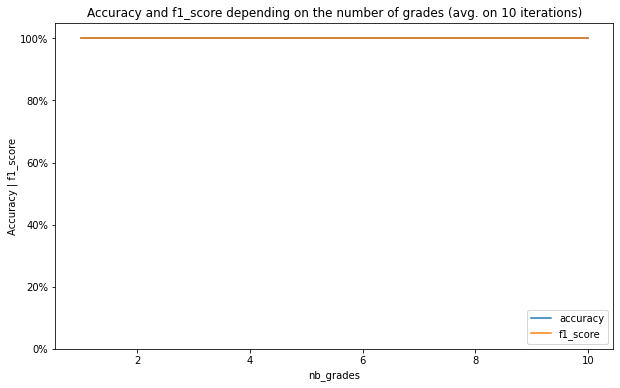

In [8]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(nb_grades_range, np.array(accuracys_)*100, label='accuracy')
plt.plot(nb_grades_range, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of grades (avg. on 10 iterations)")
plt.xlabel("nb_grades")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')


Text(0, 0.5, 'time (s)')

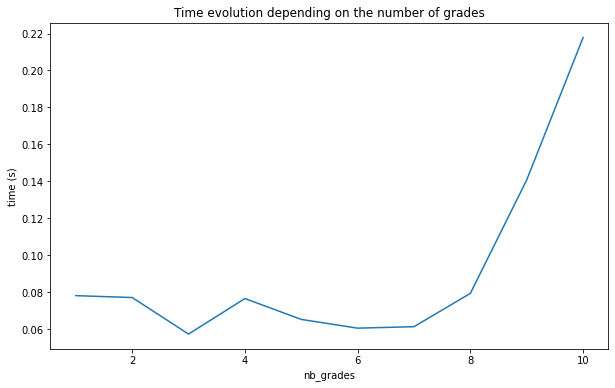

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_grades_range, times_)

plt.title("Time evolution depending on the number of grades")
plt.xlabel("nb_grades")
plt.ylabel("time (s)")

### 2.2 Test influence of size

In [15]:
sizes = [20,50,100,150,250,500,1000,2500,5000,10000]
nb_grades = 3
noise = 0
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for size in sizes:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


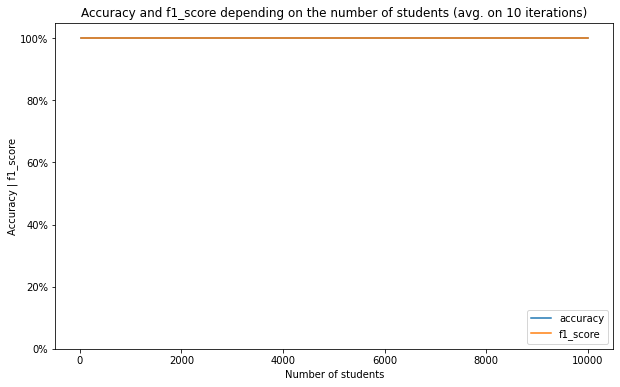

In [16]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(sizes, np.array(accuracys_)*100, label='accuracy')
plt.plot(sizes, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of students (avg. on 10 iterations)")
plt.xlabel("Number of students")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

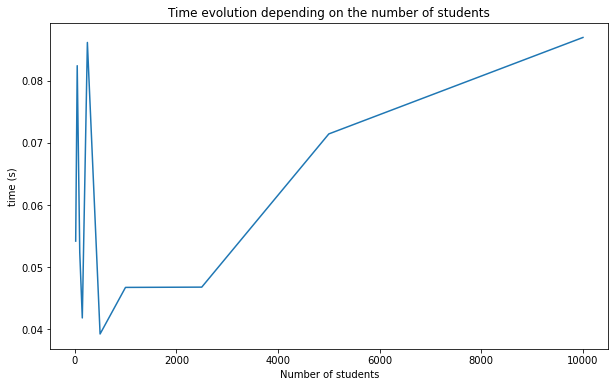

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(sizes, times_)

plt.title("Time evolution depending on the number of students")
plt.xlabel("Number of students")
plt.ylabel("time (s)")

### 2.3 Test influence of noise

In [7]:
size = 150
nb_grades = 3
noises = [0,0.01, 0.02, 0.03]
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for noise in noises:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

 20%|██        | 2/10 [00:00<00:00, 11.55it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 60%|██████    | 6/10 [00:00<00:00, 10.78it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 80%|████████  | 8/10 [00:00<00:00, 11.53it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


One of the clause is not working - Fail to converges


 10%|█         | 1/10 [00:00<00:01,  7.89it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:00<00:00, 11.26it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00, 11.83it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:00<00:00, 11.80it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00, 14.10it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:00<00:00, 13.77it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:00<00:00, 12.93it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


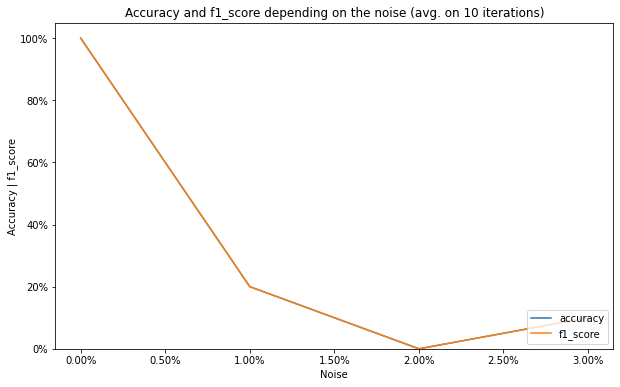

In [8]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(np.array(noises)*100, np.array(accuracys_)*100, label='accuracy')
plt.plot(np.array(noises)*100, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the noise (avg. on 10 iterations)")
plt.xlabel("Noise")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

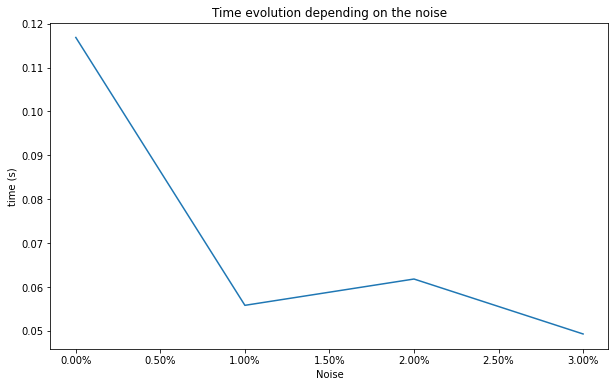

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(np.array(noises)*100, times_)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Time evolution depending on the noise")
plt.xlabel("Noise")
plt.ylabel("time (s)")

### 2.4 Multiclass impact 

In [6]:
size = 150
nb_grades = 3
noise = 0
nb_classes = [1,2,3,4,5,6,7,8,9,10] 
n_iter = 20

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for nb_class in nb_classes:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter, nb_class)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 20/20 [00:03<00:00,  5.63it/s]


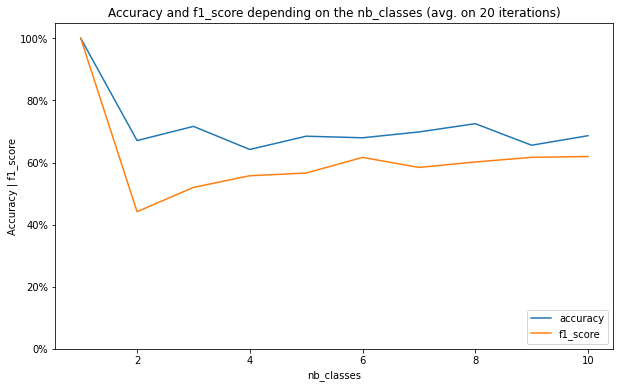

In [7]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(nb_classes, np.array(accuracys_)*100, label='accuracy')
plt.plot(nb_classes, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the nb_classes (avg. on 20 iterations)")
plt.xlabel("nb_classes")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

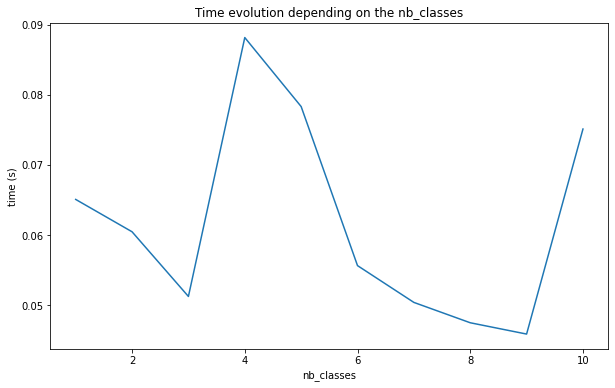

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_classes, times_)
plt.title("Time evolution depending on the nb_classes")
plt.xlabel("nb_classes")
plt.ylabel("time (s)")

## 3. Max-SAT

In [4]:
# Test Generator
import sys
sys.path.append('../')

from generator import GradesGenerator
from models import Max_SAT_Solver
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

size = 100
nb_grades = 5
noise = 0
n_iter = 25

f1_scores = []
accuracys = []
times = []
error_counts = []

for iteration in tqdm(range(n_iter)):
    gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise)
    grades,admissions = gen.generate_grades()
    SAT_Solv = Max_SAT_Solver(generator=gen)
    SAT_Solv.init_clauses(grades,admissions)
    f1_score_, accuracy_, time_, error_rate = SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

    f1_scores += [f1_score_]
    accuracys += [accuracy_]
    times += [time_]
    error_counts += [error_rate]
f1_score_avg = np.mean(f1_scores)
accuracy_avg = np.mean(accuracys)
time_avg = np.mean(times)
error_count_sum = np.sum(error_counts)

print('Avg f1_score : {:.2f} %'.format(f1_score_avg*100))
print('Avg average :  {:.2f} %'.format(accuracy_avg*100))
print('Avg time :  {:.2f} s'.format(time_avg))
print(f'Error count : {error_count_sum}')

100%|██████████| 25/25 [00:06<00:00,  3.78it/s]

Avg f1_score : 100.00 %
Avg average :  100.00 %
Avg time :  0.14 s
Error count : 0


In [3]:
def test_solver(size, nb_grades, noise, n_iter, nb_class:int=1):
    """
    Print test the solver
    Args: 
        size (int): number of students
        nb_grades (int): number of grades
        noise (float): ratio of noise
        n_iter (int): nb d'iteration for average metrics
        nb_class (int): nb de class
    Returns :
        f1_score_avg (float): average f1-score of the solution
        accuracy_avg (float): average accuracy of the solution
        time_avg (float): average time spent trying to find the optimum
        error_count_sum (int): sum of 1/0 based on if gurobi converges or not 
     """
    f1_scores = []
    accuracys = []
    times = []
    error_counts = []

    for iteration in tqdm(range(n_iter)):
        gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise, nb_class=nb_class)
        grades,admissions = gen.generate_grades()
        SAT_Solv = Max_SAT_Solver(generator=gen)
        SAT_Solv.init_clauses(grades,admissions)
        f1_score_, accuracy_, time_, error_rate = SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

        f1_scores += [f1_score_]
        accuracys += [accuracy_]
        times += [time_]
        error_counts += [error_rate]
    f1_score_avg = np.mean(f1_scores)
    accuracy_avg = np.mean(accuracys)
    time_avg = np.mean(times)
    error_count_sum = np.sum(error_counts)
    return f1_score_avg, accuracy_avg, time_avg, error_count_sum


### 3.1 Influence nb_grades

In [7]:
size = 100
nb_grades_range = [1,2,3,4,5,6,7]
noise = 0
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for nb_grades in nb_grades_range:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [16:43<00:00, 100.38s/it] 


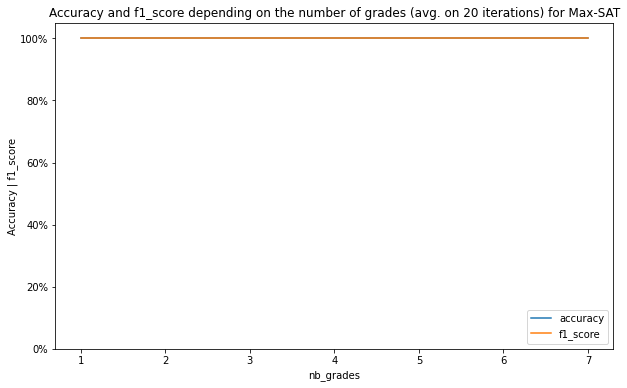

In [8]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(nb_grades_range, np.array(accuracys_)*100, label='accuracy')
plt.plot(nb_grades_range, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of grades (avg. on 20 iterations) for Max-SAT")
plt.xlabel("nb_grades")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

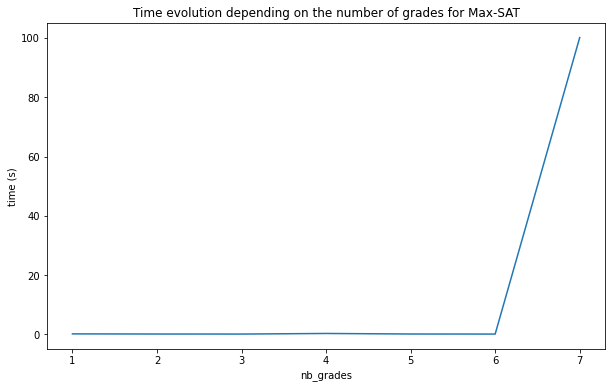

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_grades_range, times_)

plt.title("Time evolution depending on the number of grades for Max-SAT")
plt.xlabel("nb_grades")
plt.ylabel("time (s)")

### 3.2 Test influence of size

In [10]:
sizes = [20,50,100,150,250,500,1000,2500,5000]
nb_grades = 3
noise = 0
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for size in sizes:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


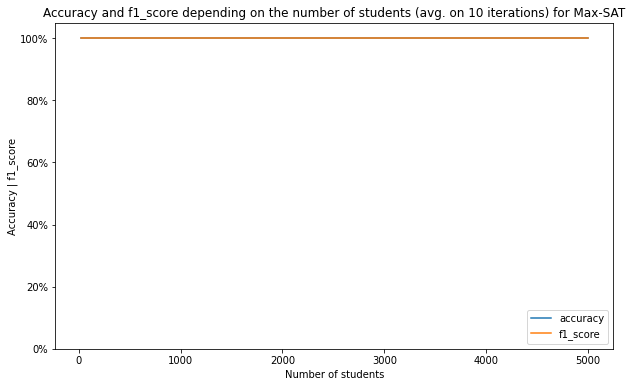

In [11]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(sizes, np.array(accuracys_)*100, label='accuracy')
plt.plot(sizes, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the number of students (avg. on 10 iterations) for Max-SAT")
plt.xlabel("Number of students")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

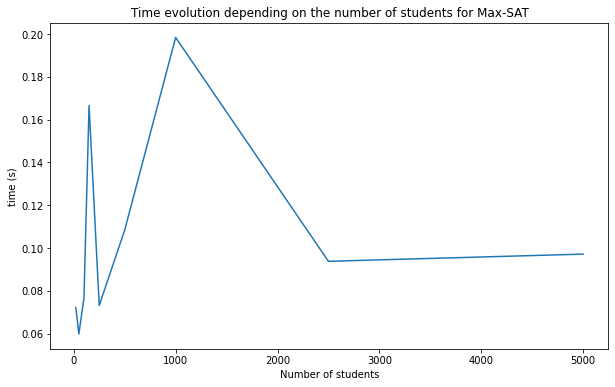

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(sizes, times_)

plt.title("Time evolution depending on the number of students for Max-SAT")
plt.xlabel("Number of students")
plt.ylabel("time (s)")

### 3.3 Test influence of noise

In [13]:
size = 150
nb_grades = 3
noises = [0,0.01, 0.02, 0.03]
n_iter = 10

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for noise in noises:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 10/10 [00:01<00:00,  6.36it/s]


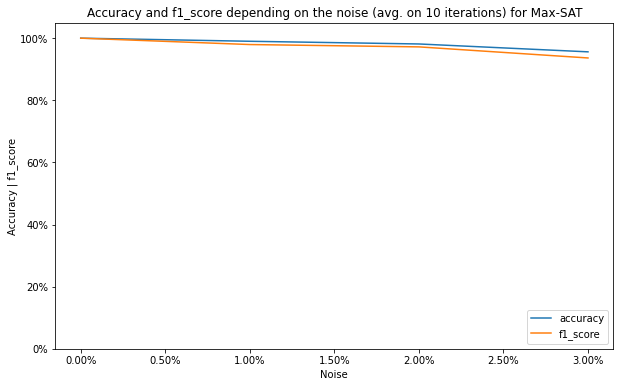

In [14]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(np.array(noises)*100, np.array(accuracys_)*100, label='accuracy')
plt.plot(np.array(noises)*100, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the noise (avg. on 10 iterations) for Max-SAT")
plt.xlabel("Noise")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

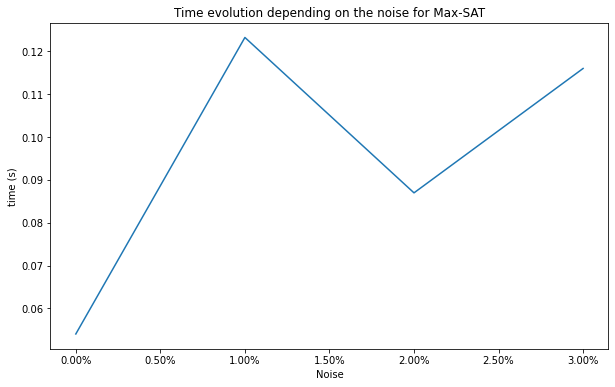

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(np.array(noises)*100, times_)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Time evolution depending on the noise for Max-SAT")
plt.xlabel("Noise")
plt.ylabel("time (s)")

### 3.4 Multiclass impact

In [16]:
size = 150
nb_grades = 3
noise = 0
nb_classes = [1,2,3,4,5,6,7,8,9,10] 
n_iter = 20

f1_scores_ = []
accuracys_ = []
times_ = []
error_counts_ = []

for nb_class in nb_classes:
    f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver(size, nb_grades, noise, n_iter, nb_class)
    f1_scores_ += [f1_score_avg]
    accuracys_ += [accuracy_avg]
    times_ += [time_avg]
    error_counts_ += [error_count_sum]

100%|██████████| 20/20 [00:03<00:00,  6.16it/s]


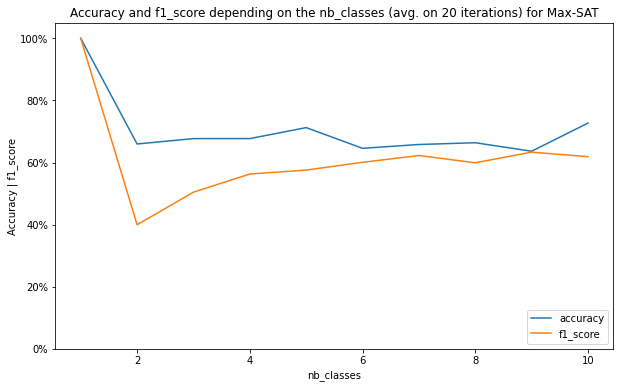

In [17]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(nb_classes, np.array(accuracys_)*100, label='accuracy')
plt.plot(nb_classes, np.array(f1_scores_)*100, label='f1_score')
ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Accuracy and f1_score depending on the nb_classes (avg. on 20 iterations) for Max-SAT")
plt.xlabel("nb_classes")
plt.ylabel("Accuracy | f1_score", labelpad=2)
plt.legend(loc='lower right')

Text(0, 0.5, 'time (s)')

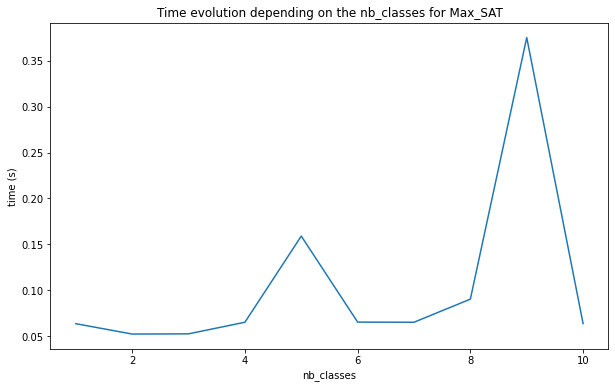

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(nb_classes, times_)
plt.title("Time evolution depending on the nb_classes for Max_SAT")
plt.xlabel("nb_classes")
plt.ylabel("time (s)")

## Test Global

In [52]:
from models import MRSort_Solver, SAT_Solver, Max_SAT_Solver

def test_solver_global(size, nb_grades, noise, n_iter, nb_class:int=1, solver='SAT'):
    """
    Print test the solver
    Args: 
        size (int): number of students
        nb_grades (int): number of grades
        noise (float): ratio of noise
        n_iter (int): nb d'iteration for average metrics
        nb_class (int): nb de class
    Returns :
        f1_score_avg (float): average f1-score of the solution
        accuracy_avg (float): average accuracy of the solution
        time_avg (float): average time spent trying to find the optimum
        error_count_sum (int): sum of 1/0 based on if gurobi converges or not 
     """
    f1_scores = []
    accuracys = []
    times = []
    error_counts = []

    for iteration in tqdm(range(n_iter)):
        gen = GradesGenerator(size=size, nb_grades=nb_grades,noise=noise, nb_class=nb_class)
        grades,admissions = gen.generate_grades()
        
        if solver == 'Max-SAT':
            MAX_SAT_Solv = Max_SAT_Solver(generator=gen)
            MAX_SAT_Solv.init_clauses(grades,admissions)
            f1_score_, accuracy_, time_, error_rate = MAX_SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

        elif solver == 'SAT':
            SAT_Solv = SAT_Solver(generator=gen)
            SAT_Solv.init_clauses(grades,admissions)
            f1_score_, accuracy_, time_, error_rate = SAT_Solv.get_results(grades,admissions, path='../', verbose=0)

        elif solver == 'MILP':
            MRSort_solv = MRSort_Solver(gen)
            MRSort_solv.set_constraint('MaxMin')
            MRSort_solv.solve()
            f1_score_, accuracy_, time_, error_rate = MRSort_solv.get_results(verbose=0)

        f1_scores += [f1_score_]
        accuracys += [accuracy_]
        times += [time_]
        error_counts += [error_rate]
    f1_score_avg = np.mean(f1_scores)
    accuracy_avg = np.mean(accuracys)
    time_avg = np.mean(times)
    error_count_sum = np.sum(error_counts)
    return f1_score_avg, accuracy_avg, time_avg, error_count_sum


In [55]:
size = 100
solvers = ['SAT','MILP','Max-SAT']
nb_grades_range = [1,2,3,4,5,6]
noise = 0
n_iter = 10

scores = {}

for solver in solvers:
    f1_scores_ = []
    accuracys_ = []
    times_ = []
    error_counts_ = []
    for nb_grades in nb_grades_range:
        f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver_global(size, nb_grades, noise, n_iter, solver=solver)
        f1_scores_ += [f1_score_avg]
        accuracys_ += [accuracy_avg]
        times_ += [time_avg]
        error_counts_ += [error_count_sum]
    scores[solver] = {'f1': f1_scores_, 'acc': accuracys_,'time': times_}

 10%|█         | 1/10 [00:01<00:13,  1.54s/it]

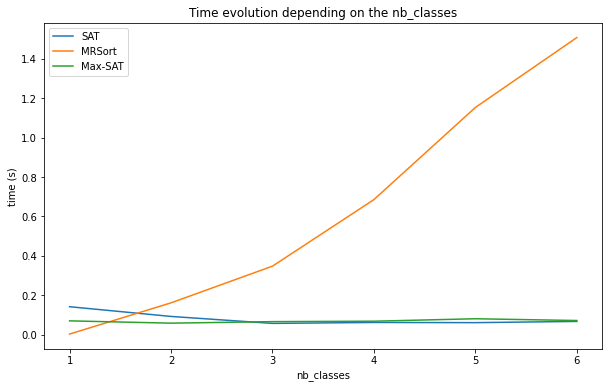

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for solver in solvers:
    plt.plot(nb_grades_range, scores[solver]['time'],label=solver)
    
plt.title(f"Time evolution depending on the nb_grades")
plt.xlabel("nb_grades")
plt.ylabel("time (s)")
plt.legend(loc='upper left')

In [ ]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

for solver in solvers:
    plt.plot(np.array(nb_grades_range), np.array(scores[solver]['acc'])*100,label=solver)

ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title(f"Accuracy evolution depending on the nb_grades")
plt.xlabel("nb_grades")
plt.ylabel("time (s)")
plt.legend(loc='upper left')

In [53]:
size = 100
solvers = ['SAT','MILP','Max-SAT']
nb_grades = 3
noises = [0,0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]
n_iter = 10

scores = {}

for solver in solvers:
    f1_scores_ = []
    accuracys_ = []
    times_ = []
    error_counts_ = []
    for noise in noises:
        f1_score_avg, accuracy_avg, time_avg, error_count_sum = test_solver_global(size, nb_grades, noise, n_iter, solver=solver)
        f1_scores_ += [f1_score_avg]
        accuracys_ += [accuracy_avg]
        times_ += [time_avg]
        error_counts_ += [error_count_sum]
    scores[solver] = {'f1': f1_scores_, 'acc': accuracys_,'time': times_}

 10%|█         | 1/10 [00:00<00:01,  5.76it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:00<00:01,  4.34it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00,  5.45it/s]

One of the clause is not working - Fail to converges


 80%|████████  | 8/10 [00:01<00:00,  5.74it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 20%|██        | 2/10 [00:00<00:01,  4.66it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 40%|████      | 4/10 [00:00<00:00,  6.75it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 60%|██████    | 6/10 [00:00<00:00,  6.64it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:01<00:00,  3.81it/s]

One of the clause is not working - Fail to converges


 80%|████████  | 8/10 [00:01<00:00,  3.23it/s]

One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:02<00:00,  3.39it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 10%|█         | 1/10 [00:00<00:04,  2.07it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:02<00:05,  1.20it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:02<00:02,  2.42it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:03<00:00,  3.62it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:03<00:00,  4.94it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:03<00:00,  2.84it/s]


One of the clause is not working - Fail to converges


 10%|█         | 1/10 [00:00<00:01,  6.38it/s]

One of the clause is not working - Fail to converges


 20%|██        | 2/10 [00:00<00:01,  7.36it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:00<00:01,  6.92it/s]

One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00,  5.19it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:01<00:00,  6.77it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:01<00:00,  7.04it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


One of the clause is not working - Fail to converges


 20%|██        | 2/10 [00:00<00:01,  6.65it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00,  7.94it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:00<00:00,  7.81it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:01<00:00,  7.75it/s]

One of the clause is not working - Fail to converges
One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:01<00:00,  7.81it/s]


One of the clause is not working - Fail to converges


 10%|█         | 1/10 [00:00<00:01,  6.48it/s]

One of the clause is not working - Fail to converges


 20%|██        | 2/10 [00:00<00:01,  7.04it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:00<00:01,  6.79it/s]

One of the clause is not working - Fail to converges


 40%|████      | 4/10 [00:00<00:00,  6.65it/s]

One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00,  6.79it/s]

One of the clause is not working - Fail to converges


 60%|██████    | 6/10 [00:00<00:00,  6.84it/s]

One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:01<00:00,  6.80it/s]

One of the clause is not working - Fail to converges


 80%|████████  | 8/10 [00:01<00:00,  6.58it/s]

One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:01<00:00,  6.85it/s]

One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


One of the clause is not working - Fail to converges


 10%|█         | 1/10 [00:00<00:01,  6.46it/s]

One of the clause is not working - Fail to converges


 20%|██        | 2/10 [00:00<00:01,  7.45it/s]

One of the clause is not working - Fail to converges


 30%|███       | 3/10 [00:00<00:00,  7.36it/s]

One of the clause is not working - Fail to converges


 40%|████      | 4/10 [00:00<00:00,  6.59it/s]

One of the clause is not working - Fail to converges


 50%|█████     | 5/10 [00:00<00:00,  6.10it/s]

One of the clause is not working - Fail to converges


 60%|██████    | 6/10 [00:00<00:00,  6.57it/s]

One of the clause is not working - Fail to converges


 70%|███████   | 7/10 [00:01<00:00,  6.67it/s]

One of the clause is not working - Fail to converges


 80%|████████  | 8/10 [00:01<00:00,  6.27it/s]

One of the clause is not working - Fail to converges


 90%|█████████ | 9/10 [00:01<00:00,  6.52it/s]

One of the clause is not working - Fail to converges


100%|██████████| 10/10 [00:01<00:00,  6.38it/s]

One of the clause is not working - Fail to converges



 40%|████      | 4/10 [00:06<00:09,  1.65s/it]

 70%|███████   | 7/10 [00:10<00:04,  1.46s/it]

 60%|██████    | 6/10 [00:08<00:05,  1.44s/it]

 90%|█████████ | 9/10 [00:14<00:01,  1.56s/it]

 50%|█████     | 5/10 [00:10<00:12,  2.57s/it]

 80%|████████  | 8/10 [00:15<00:03,  1.80s/it]

 40%|████      | 4/10 [00:05<00:08,  1.45s/it]

 70%|███████   | 7/10 [00:12<00:06,  2.18s/it]

 80%|████████  | 8/10 [00:14<00:04,  2.01s/it]

 20%|██        | 2/10 [00:02<00:11,  1.42s/it]

 60%|██████    | 6/10 [00:08<00:05,  1.42s/it]

 80%|████████  | 8/10 [00:11<00:03,  1.58s/it]

100%|██████████| 10/10 [00:02<00:00,  4.40it/s]


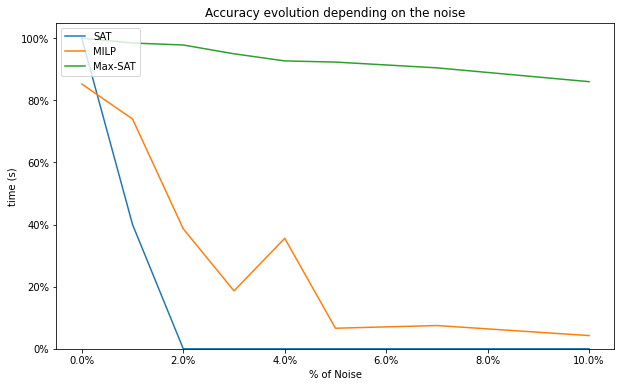

In [54]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

for solver in solvers:
    plt.plot(np.array(noises)*100, np.array(scores[solver]['f1'])*100,label=solver)

ax.set_ylim(0, 105)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title(f"Accuracy evolution depending on the noise")
plt.xlabel("% of Noise")
plt.ylabel("time (s)")
plt.legend(loc='upper left')